In [1]:
## Run this cell to install required packages
# !uv pip install numpy pandas matplotlib -q

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OUTPUT_FOLDER = "results"

In [3]:
# Load generated dataset
df = pd.read_csv("results/diff_analysis.csv", encoding='utf-8', encoding_errors='surrogateescape')
df["new_file_path"] = df["new_file_path"].astype(str)
print(f"Total records in dataset: {len(df)}")

Total records in dataset: 95506


In [4]:
# Helper function to categorize files
def categorize_file(filepath):
    if filepath is None:
        return 'Other'
    if 'test' in filepath.lower() or 'spec' in filepath.lower() or 'mock' in filepath.lower():
        return 'Test Code'
    if filepath.endswith(('.py', '.java', '.c', '.cpp', '.h', '.js', '.ts', ".rb", ".go", ".php")):
        return 'Source Code'
    if 'README' in filepath.upper():
        return 'README'
    if 'LICENSE' in filepath.upper() or 'COPYING' in filepath.upper():
        return 'LICENSE'
    return 'Other'

# Apply the categorization to the new_file_path column
df['FileType'] = df['new_file_path'].apply(categorize_file)

file_types = df['FileType'].unique()
print(f"Found file types: {file_types}")

Found file types: ['README' 'Other' 'Source Code' 'Test Code' 'LICENSE']


In [5]:
# --- Calculate statistics as required  ---
# Filter for rows where there is a discrepancy
mismatches_df = df[df['Discrepancy'] == 'Yes'].copy()
print(f"Total mismatches found: {len(mismatches_df)}")

mismatch_counts = mismatches_df['FileType'].value_counts().reindex(["Source Code", "Test Code", "README", "LICENSE", "Other"]).fillna(0)

print("\nFinal Dataset Statistics:")
print(mismatch_counts)

Total mismatches found: 3998

Final Dataset Statistics:
FileType
Source Code    2406
Test Code       757
README           13
LICENSE           2
Other           820
Name: count, dtype: int64



Plot saved to results/mismatch_analysis_bar_chart.png


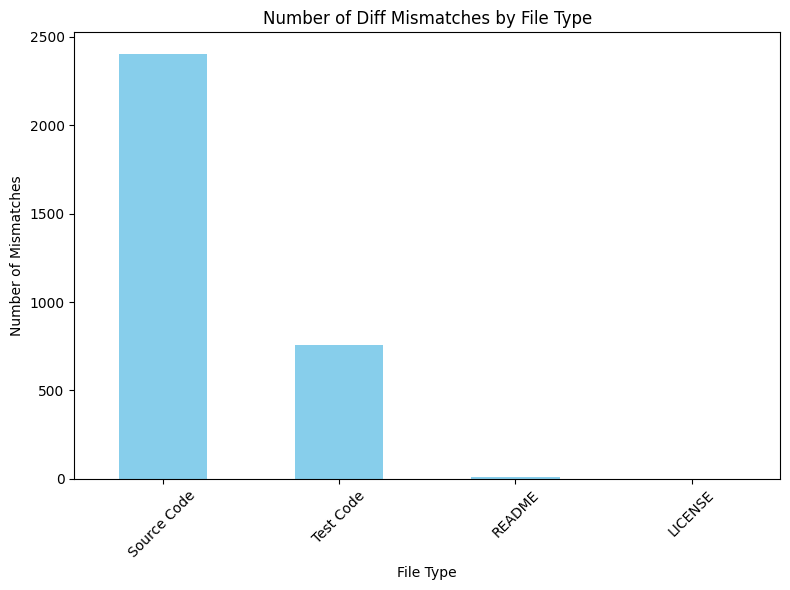

In [6]:
# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.title('Number of Diff Mismatches by File Type')
mismatch_counts[["Source Code", "Test Code", "README", "LICENSE"]].plot(kind='bar', color=['skyblue'])
plt.xlabel('File Type')
plt.ylabel('Number of Mismatches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{OUTPUT_FOLDER}/mismatch_analysis_bar_chart.png")
print(f"\nPlot saved to {OUTPUT_FOLDER}/mismatch_analysis_bar_chart.png")
plt.show()


Pie chart saved to results/mismatch_analysis_pie_chart.png


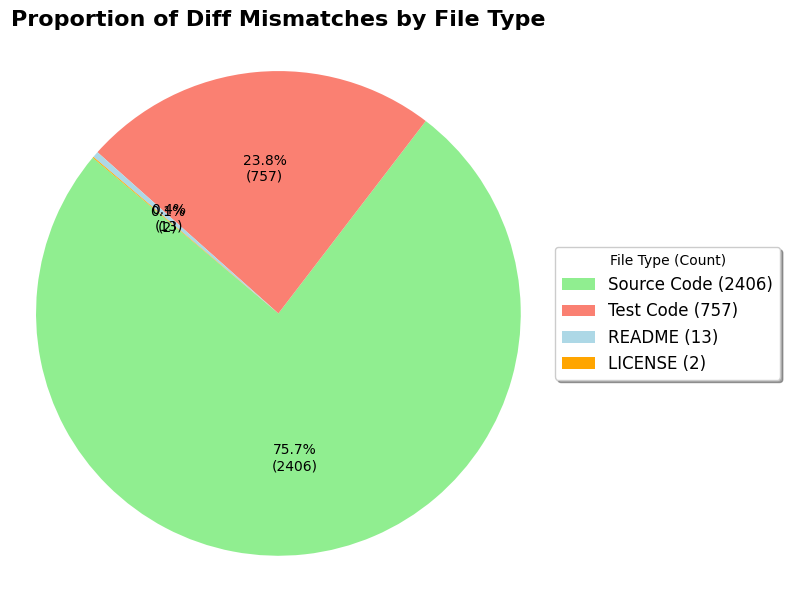

In [7]:
plt.figure(figsize=(8, 6))
plt.title('Proportion of Diff Mismatches by File Type', fontsize=16, fontweight='bold', pad=15)

labels = [f"{ftype} ({int(mismatch_counts[ftype])})" for ftype in ["Source Code", "Test Code", "README", "LICENSE"]]
counts = mismatch_counts[["Source Code", "Test Code", "README", "LICENSE"]].values
colors = ['lightgreen', 'salmon', 'lightblue', 'orange']

wedges, texts, autotexts = plt.pie(
    counts,
    labels=None,  # We'll use legend for labels
    autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100.*sum(counts)))})" if pct > 0 else '',
    startangle=140,
    colors=colors,
)

plt.ylabel('')  # Hide y-label for pie chart
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle

# Add legend with file type and count
plt.legend(wedges, labels, title="File Type (Count)", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, frameon=True, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig(f"{OUTPUT_FOLDER}/mismatch_analysis_pie_chart.png", bbox_inches="tight")
print(f"\nPie chart saved to {OUTPUT_FOLDER}/mismatch_analysis_pie_chart.png")
plt.show()

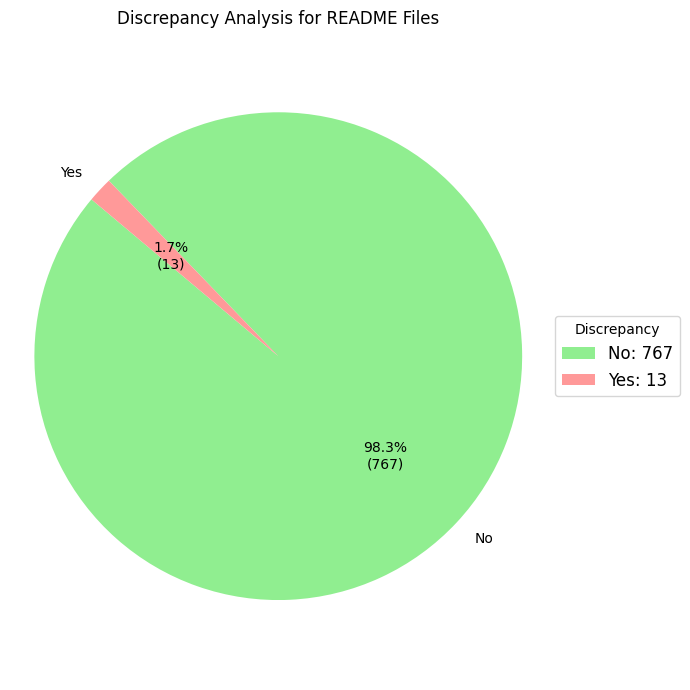

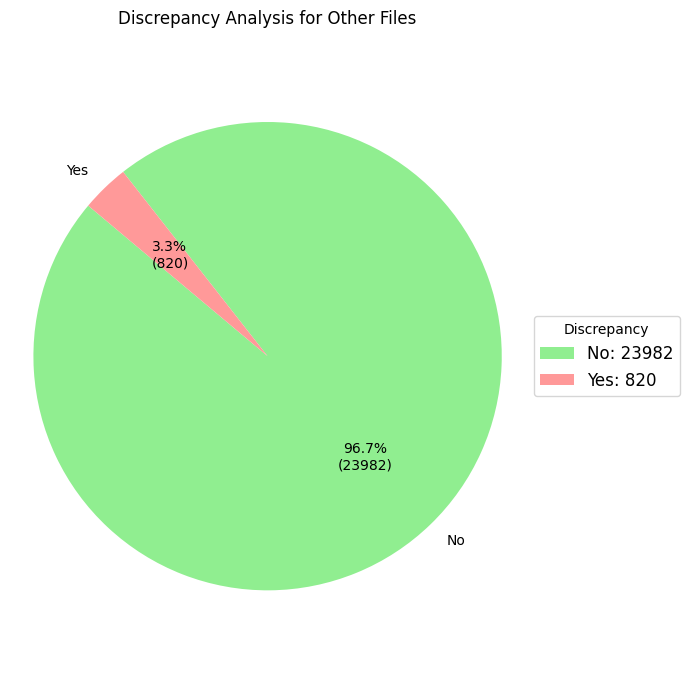

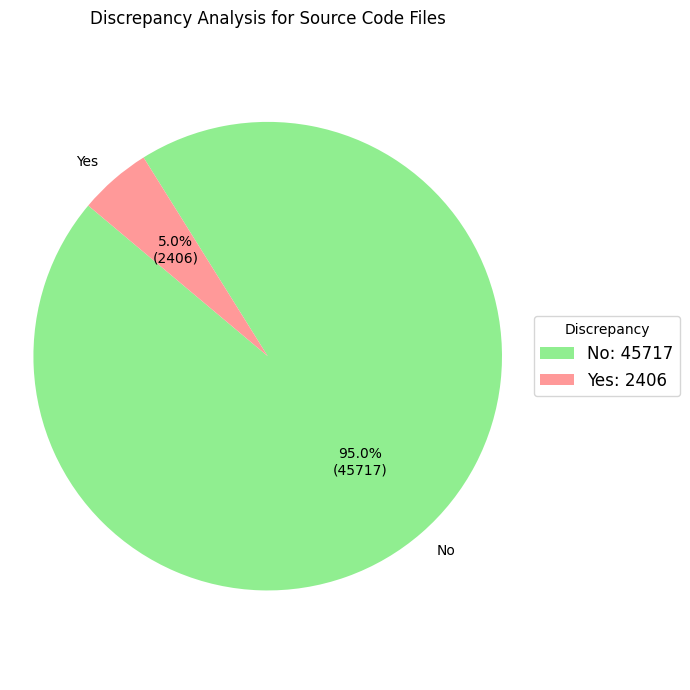

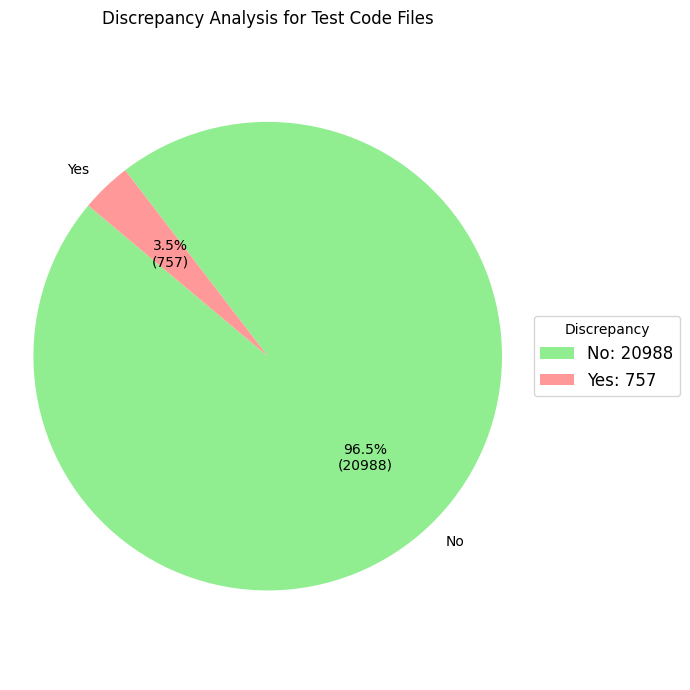

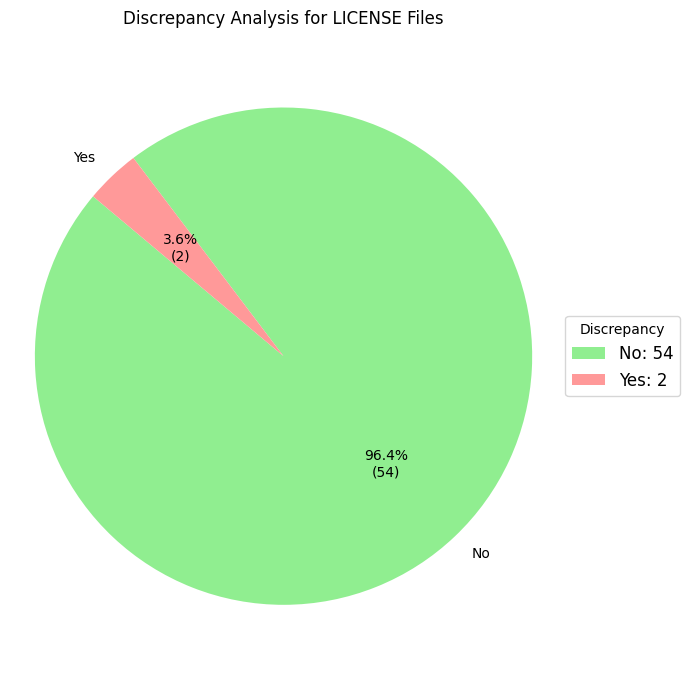

In [8]:
# Loop through each unique file type and create a pie chart
for f_type in file_types:
    # Filter the DataFrame for the current file type
    subset_df = df[df['FileType'] == f_type]
    discrepancy_counts = subset_df['Discrepancy'].value_counts()
    
    if not discrepancy_counts.empty:
        # print(f"\nGenerating chart for: {f_type}")
        plt.figure(figsize=(7, 7))
        colors = ['lightgreen', '#ff9999', '#99ff99', '#ffcc99']  # Custom color palette
        wedges, texts, autotexts = plt.pie(
            discrepancy_counts,
            labels=discrepancy_counts.index,
            autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100.*sum(discrepancy_counts)))})",  # Show percent and count
            startangle=140,
            colors=colors[:len(discrepancy_counts)],
        )

        plt.title(f'Discrepancy Analysis for {f_type} Files')
        plt.ylabel('')  # Hide y-axis label
        plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
        # Add a legend with counts
        plt.legend(wedges, [f"{label}: {count}" for label, count in discrepancy_counts.items()],
                   title="Discrepancy", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
        plt.tight_layout()
        plt.savefig(f"{OUTPUT_FOLDER}/pie_chart_{f_type.replace(' ', '_')}.png", bbox_inches="tight")
        plt.show()
    else:
        print(f"\nSkipping {f_type}: No discrepancy data found.")